In [ ]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Общие функции (ввод, график)

```
# def f_input():
  '''
  Функция для ввода данных для алгоритмов 1-3
  Выходные данные: список введенных значений
  '''
```
```
# def f_input_new():
  '''
  Функция для ввода данных для алгоритма 4
  Выходные данные: список введенных значений
  '''
```
```
# def graph(y,g,x_solve):
  '''
  Функция для построения графика для алгоритмов 1-3
  Входные данные:
  y - функция в аналитическом виде, str
  g - границы области оптимизации, str
  x_solve - найденный минимум, float
  Выходные данные: печать графика с функцией и точкой минимума
  '''
```
```
# def graph_new(y,g,x_solve):
  '''
  Функция для построения графика для алгоритма 4
  Входные данные:
  y - функция в аналитическом виде, str
  x_solve - найденный минимум, float
  Выходные данные: печать графика с функцией и точкой минимума
  '''
```

In [ ]:
def f_input():
  '''
  Функция для ввода данных
  '''
  y=input('Введите функцию y=f(x). Пример: x**2. Ввод:')
  g=input('Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:')
  h=input('Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:')
  if int(h)==1:
    eps=input('Введите точность оптимизации. Пример: 0.0001. Ввод:')
    step_max=input('Введите максимальное число итераций. Пример: 500. Ввод:')
    options=input('Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:')
    dataset=input('Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:')
    return [y,g,eps,step_max,options,dataset]
  else:
    return [y,g]

In [ ]:
def f_input_new():
  '''
  Функция для вводы данных
  '''
  y=input('Введите функцию y=f(x). Пример: x**2. Ввод:')
  x_k=input('Введите начальную точку. Пример: 0. Ввод:')
  h=input('Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:')
  if int(h)==1:
    rho=input('Введите параметр для первого условия Вольфе. Пример: 0.0001. Ввод:')
    sigma=input('Введите параметр для второго условия Вольфе. Пример: 0.1. Ввод:')
    alpha_max=input('Введите максимально возможное значение аргумента. Пример: 100. Ввод:')
    len_x=input('Введите порог выхода по длине интервала поиска. Пример: 0.00001. Ввод:')
    step_max=input('Введите максимальное число итераций. Пример: 500. Ввод:')
    options=input('Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:')
    dataset=input('Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:')
    return [y,x_k,rho,sigma,alpha_max,len_x,step_max,options,dataset]
  else:
    return [y,x_k]

In [ ]:
def graph(y,g,x_solve):
  a=g.split(',')[0].replace('[','')
  b=g.split(',')[1].replace(']','')
  if 'pi' in a:
    a=float(a.split('*')[0])
    a=float(a*pi)
  else:
    a=float(a)
  if 'pi' in b:
    b=float(b.split('*')[0])
    b=float(b*pi)
  else:
    b=float(b)
  x_range=np.linspace(a+0.01,b-0.01,100)
  y1=parsing.sympy_parser.parse_expr(y)
  for x_ in y1.free_symbols:
    x=x_
  y_range=[y1.subs(x,x_range[i]) for i in range(len(x_range))]
  y_min=y1.subs(x,x_solve)
  plt.figure(figsize=(10, 7))
  plt.plot(x_range, y_range,color='b')
  s='График функции '+str(y)
  plt.title(s)
  plt.scatter(x_solve,y_min,color='g',label='Точка минимума',s=100)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
def graph_new(y,x_solve):
  x_range=np.linspace(x_solve-1,x_solve+1,100)
  y1=parsing.sympy_parser.parse_expr(y)
  for x_ in y1.free_symbols:
    x=x_
  y_range=[y1.subs(x,x_range[i]) for i in range(len(x_range))]
  y_min=y1.subs(x,x_solve)
  plt.figure(figsize=(10, 7))
  plt.plot(x_range, y_range,color='b')
  s='График функции '+str(y)
  plt.title(s)
  plt.scatter(x_solve,y_min,color='g',label='Точка минимума',s=100)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  plt.grid()
  plt.legend()
  plt.show()

## Золотое сечение

```
# def gold_ratio(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция для нахождения минимума методом золотого сечения
  Входные данные:
  y - функция в аналитическом виде, str
  g - границы области оптимизации, str
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр
  '''
# def all_f_for_gold_ratio():
  '''
  Функция для объединения ввода, нахождения минимума и построения графика
  '''
```

In [ ]:
def gold_ratio(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  step=1
  y=parsing.sympy_parser.parse_expr(y)
  for x_ in y.free_symbols:
    x=x_
  eps=float(eps)
  step_max=int(step_max)
  a=g.split(',')[0].replace('[','')
  b=g.split(',')[1].replace(']','')
  if 'pi' in a:
    a=a.split('*')
    a=float(a[0])*pi
  else:
    a=float(a)
  if 'pi' in b:
    b=b.split('*')
    b=float(b[0])*pi
  else:
    b=float(b)
  if dataset=='True':
    data=pd.DataFrame([[0,a,b,'-','-','-','-']],columns=['Номер итерации','a','b','x1','x2','x_solve','y'])
  p=(1+5**(1/2))/2
  while math.fabs(b-a)>eps and step<step_max:
    x1=b-(b-a)/p
    x2=a+(b-a)/p
    if float(y.subs(x,x1)) > float(y.subs(x,x2)):
      a=x1
    else:
      b=x2
    x_solve=float((a+b)/2)
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',f'{float(x_solve):.5f}','y =',f'{float(y.subs(x,x_solve)):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,a,b,x1,x2,f'{float(x_solve):.5f}',f'{float(y.subs(x,x_solve)):.5f}']],columns=['Номер итерации','a','b','x1','x2','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
    step+=1
  x_solve=(a+b)/2
  print('Полученный минимум функции методом золотого сечения: x =',f'{float(x_solve):.5f}','y =',f'{float(y.subs(x,x_solve)):.5f}')
  if dataset=='True':
    return data,x_solve
  else:
    return x_solve

In [ ]:
def all_f_for_gold_ratio():
  a=a=f_input()
  s=gold_ratio(*a)
  if type(s)==tuple:
    graph(a[0],a[1],s[1])
  else:
    graph(a[0],a[1],s)

## Золтое сечение. Примеры.

Введите функцию y=f(x). Пример: x**2. Ввод:10+x**2-10*cos(2*pi*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5.12,5.12]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = -0.99496 y = 0.99496


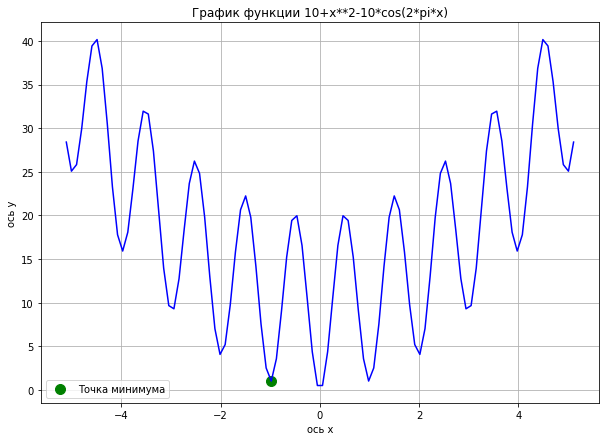

In [ ]:
#Функция Растригина
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:(x**4-16*x**2+5*x)/2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5,5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = -2.90353 y = -39.16617


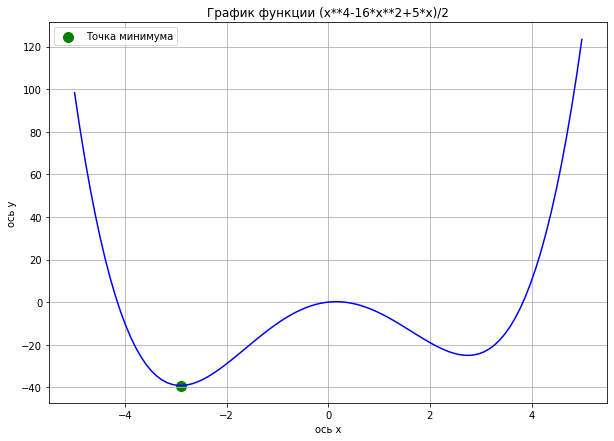

In [ ]:
#Функция Стыбинского-Танга
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:10+x**2-10*cos(2*pi*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5.12,5.12]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:1
Введите точность оптимизации. Пример: 0.0001. Ввод:0.00001
Введите максимальное число итераций. Пример: 500. Ввод:25
Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:True
Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:True
Промежуточный результат на итерации 1 : x = -1.95567 y = 4.21010
Промежуточный результат на итерации 2 : x = -0.74700 y = 10.74662
Промежуточный результат на итерации 3 : x = -1.49400 y = 22.22491
Промежуточный результат на итерации 4 : x = -1.03233 y = 1.27125
Промежуточный результат на итерации 5 : x = -0.74700 y = 10.74662
Промежуточный результат на итерации 6 : x = -0.92334 y = 1.99032
Промежуточный результат на итерации 7 : x = -1

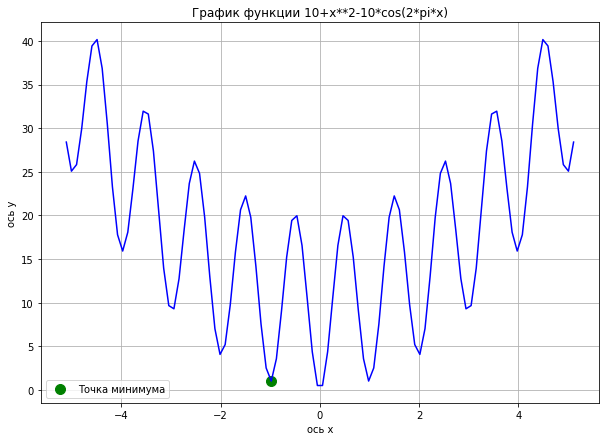

In [ ]:
#Пример работы функции с промежуточными результатми на каждой итерации
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:(x**4-16*x**2+5*x)/2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5,5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:1
Введите точность оптимизации. Пример: 0.0001. Ввод:0.0001
Введите максимальное число итераций. Пример: 500. Ввод:500
Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:False
Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:True
Полученный минимум функции методом золотого сечения: x = -2.90355 y = -39.16617


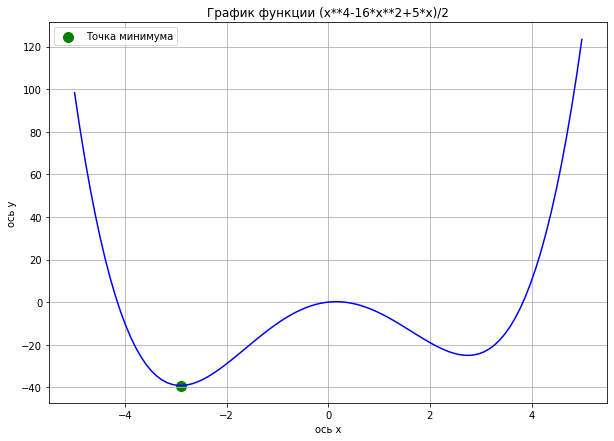

In [ ]:
#Пример работы функции с сохранением промежуточных результатов в dataframe
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:-5*x**5+4*x**4-12*x**3+11*x**2-2*x+1
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-0.5,0.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 0.10986 y = 0.89763


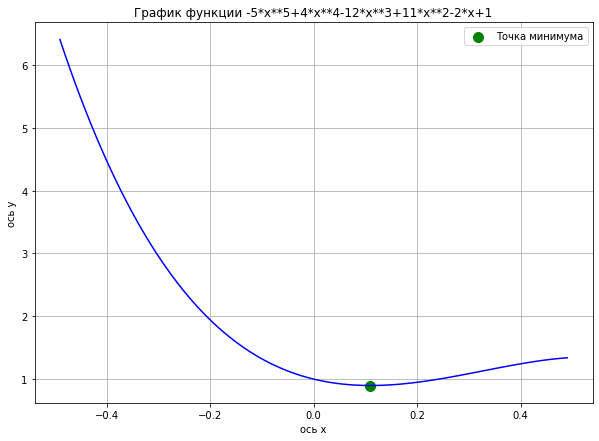

In [ ]:
#Функции для тестирования из файла ТЗ
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:(log(x-2))**2+(log(10-x))**2-x**0.2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[6,9.9]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 8.50159 y = 2.13384


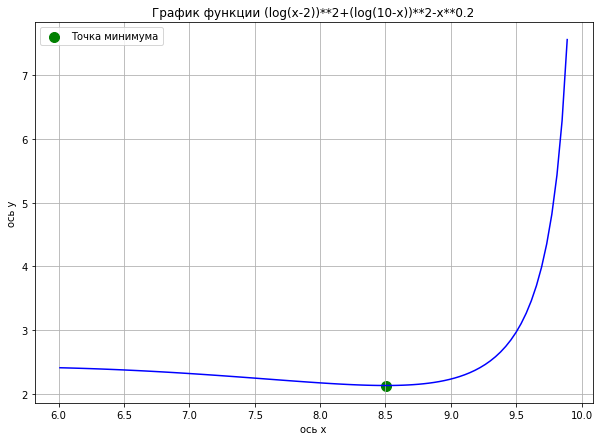

In [ ]:
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:-3*x*sin(0.75*x)+exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,2*pi]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 2.70648 y = -7.27436


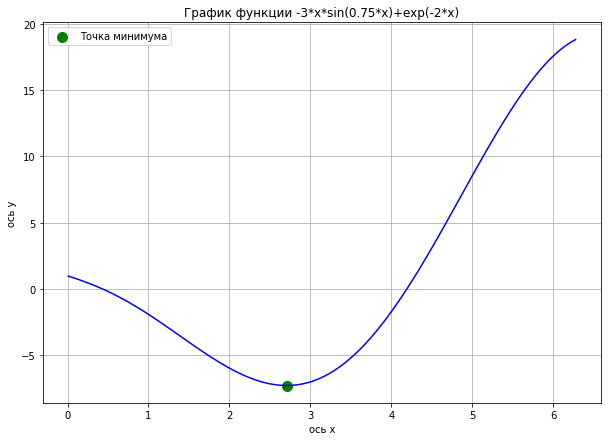

In [ ]:
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 0.24079 y = 5.14834


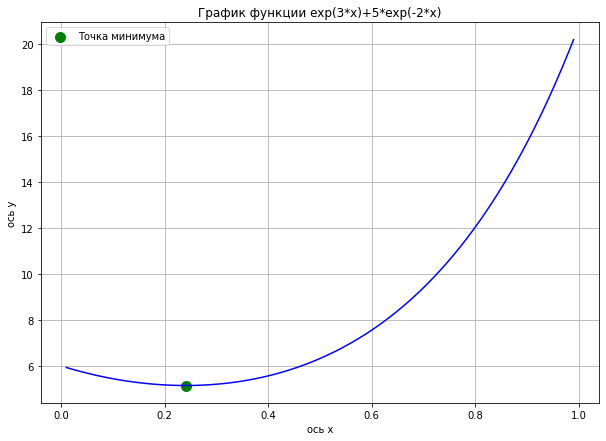

In [ ]:
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.5,2.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 2.12464 y = 0.35098


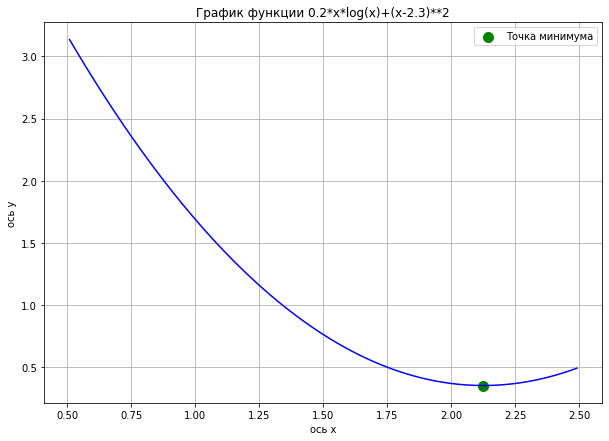

In [ ]:
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:3*x-log(x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.1,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 0.33333 y = 2.09861


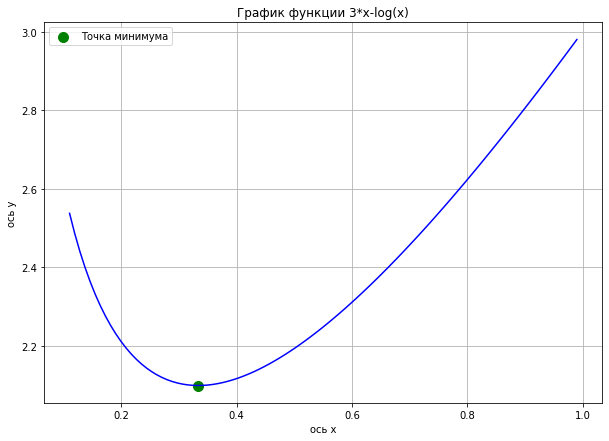

In [ ]:
#Собственные примеры тестирования алгоритма
all_f_for_gold_ratio()

Введите функцию y=f(x). Пример: x**2. Ввод:Abs(x+2)+3*Abs(x-3)-2*Abs(x-2)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-1,4]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом золотого сечения: x = 3.00000 y = 3.00001


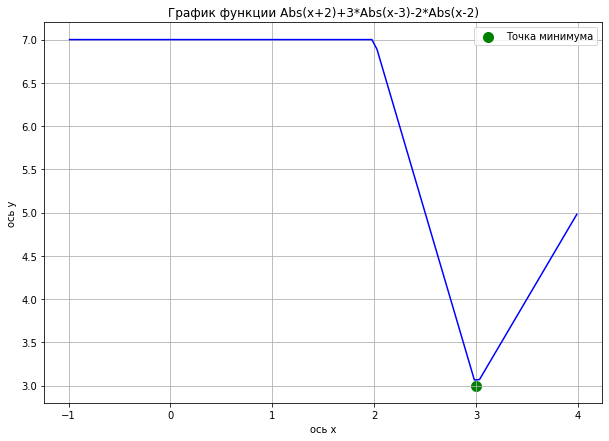

In [ ]:
all_f_for_gold_ratio()

## Метод парабол

```
# def method_parabola(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция для нахождения минимума методом парабол
  Входные данные:
  y - функция в аналитическом виде, str
  g - границы области оптимизации, str
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр
  '''
# def all_f_for_method_parabola():
  '''
  Функция для объединения ввода, нахождения минимума и построения графика
  '''
```

In [ ]:
def method_parabola(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  step=1
  y=parsing.sympy_parser.parse_expr(y)
  for x_ in y.free_symbols:
    x=x_
  eps=float(eps)
  step_max=float(step_max)
  a=g.split(',')[0].replace('[','')
  b=g.split(',')[1].replace(']','')
  if 'pi' in a:
    a=a.split('*')
    a=float(a[0])*pi
  else:
    a=float(a)
  if 'pi' in b:
    b=b.split('*')
    b=float(b[0])*pi
  else:
    b=float(b)
  x2=a+0.2
  x1=a+0.1
  x3=b-0.1
  while y.subs(x,x2)>y.subs(x,x1) or y.subs(x,x2)>y.subs(x,x3):
    x2+=0.1
  f1=float(y.subs(x,x1))
  f2=float(y.subs(x,x2))
  f3=float(y.subs(x,x3))
  a0=f1
  a1=(f2-f1)/(x2-x1)
  a2=((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
  x_solve=float(1/2*(x1+x2-a1/a2))
  x_solve_old=x_solve-1
  if dataset=='True':
    data=pd.DataFrame([[0,x1,x2,x3,a0,a1,a2,f'{float(x_solve):.5f}',f'{float(y.subs(x,x_solve)):.5f}']],columns=['Номер итерации','x1','x2','x3','a0','a1','a2','x_solve','y'])
  while math.fabs(x_solve_old-x_solve)>eps and step<step_max:
    f_x=float(y.subs(x,x_solve))
    f_x2=float(y.subs(x,x2))
    if f_x < f_x2:
      if x_solve < x2:
        x3 = x2
        x2=x_solve
      else:
        x1 = x2
        x2 = x_solve
    else:
      if x2 < x_solve:
        x3 = x_solve
      else:
        x1 = x_solve
    f1=float(y.subs(x,x1))
    f2=float(y.subs(x,x2))
    f3=float(y.subs(x,x3))
    a0=f1
    a1=(f2-f1)/(x2-x1)
    a2=((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
    x_solve_old=x_solve
    x_solve=float(1/2*(x1+x2-a1/a2))
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',f'{float(x_solve):.5f}','y =',f'{float(y.subs(x,x_solve)):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x1,x2,x3,a0,a1,a2,f'{float(x_solve):.5f}',f'{float(y.subs(x,x_solve)):.5f}']],columns=['Номер итерации','x1','x2','x3','a0','a1','a2','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
    step+=1
  print('Полученный минимум функции методом парабол: x =',f'{float(x_solve):.5f}','y =',f'{float(y.subs(x,x_solve)):.5f}')
  if dataset=='True':
    return data,x_solve
  else:
    return x_solve

In [ ]:
def all_f_of_method_parabola():
  a=a=f_input()
  s=method_parabola(*a)
  if type(s)==tuple:
    graph(a[0],a[1],s[1])
  else:
    graph(a[0],a[1],s)

## Метод парабол. Примеры

Введите функцию y=f(x). Пример: x**2. Ввод:10+x**2-10*cos(2*pi*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-1,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 0.00000 y = 0.00000


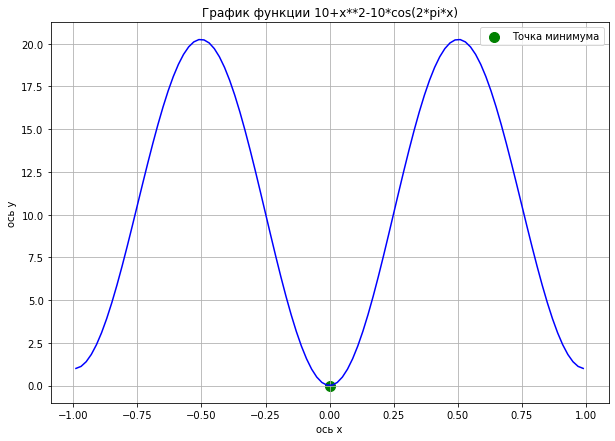

In [ ]:
#Функция Растригина
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:(x**4-16*x**2+5*x)/2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5,5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = -2.90352 y = -39.16617


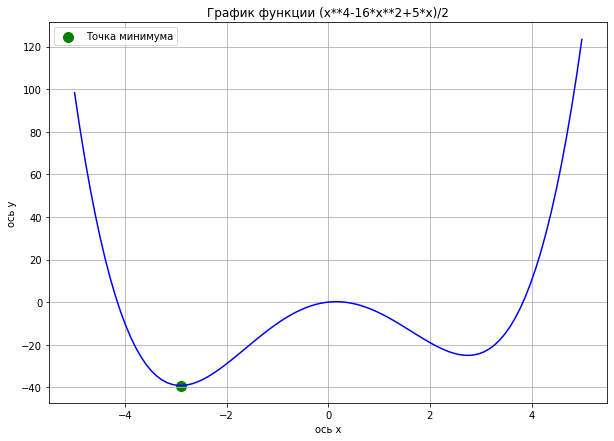

In [ ]:
#Функция Стыбинского-Танга
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:-5*x**5+4*x**4-12*x**3+11*x**2-2*x+1
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-0.5,0.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 0.10986 y = 0.89763


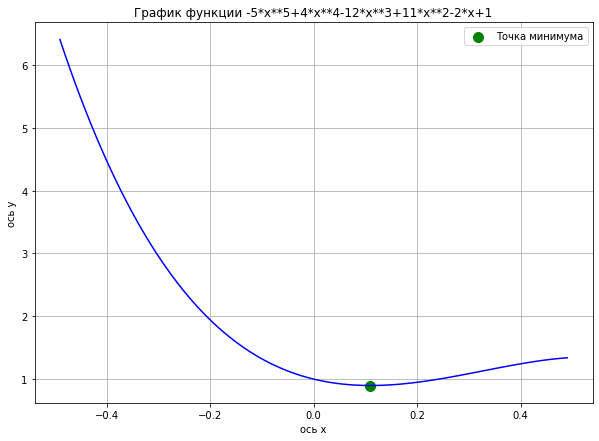

In [ ]:
#Функции для тестирования из файла ТЗ
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:(log(x-2))**2+(log(10-x))**2-x**0.2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[6,9.9]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 8.50149 y = 2.13384


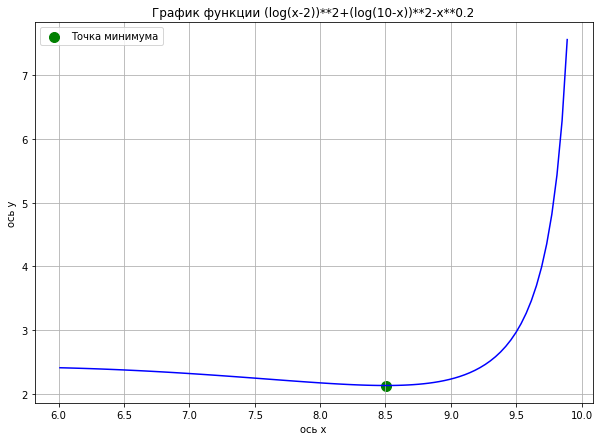

In [ ]:
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:-3*x*sin(0.75*x)+exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,2*pi]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 2.70648 y = -7.27436


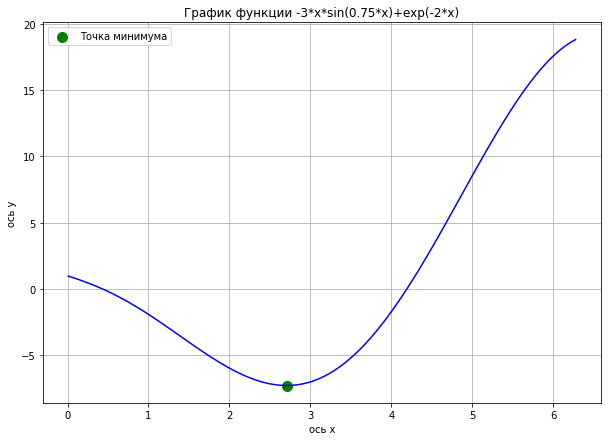

In [ ]:
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 0.24079 y = 5.14834


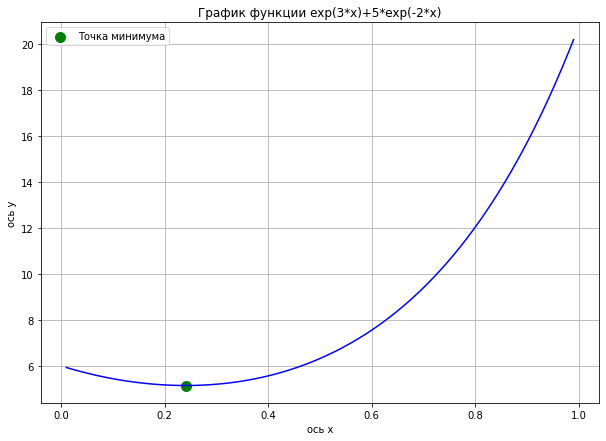

In [ ]:
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.5,2.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 2.12464 y = 0.35098


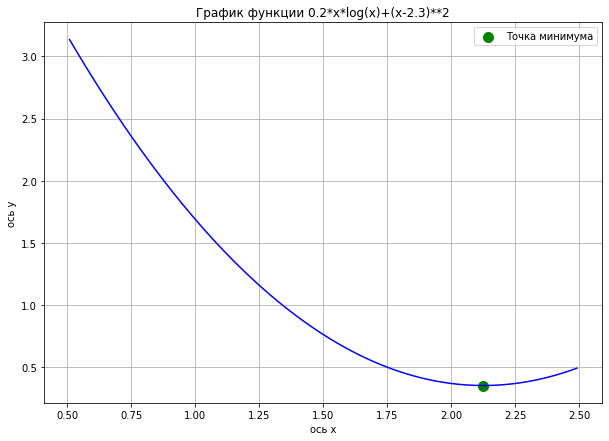

In [ ]:
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:3*x-log(x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.1,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 0.33333 y = 2.09861


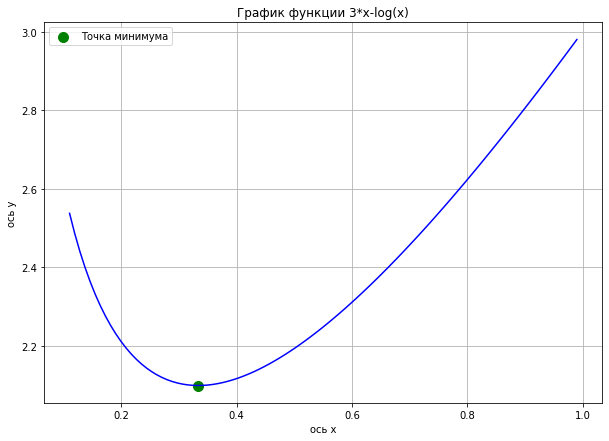

In [ ]:
#Собственные примеры тестирования алгоритма
all_f_of_method_parabola()

Введите функцию y=f(x). Пример: x**2. Ввод:Abs(x+2)+3*Abs(x-3)-2*Abs(x-2)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-1,4]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 3.00001 y = 3.00002


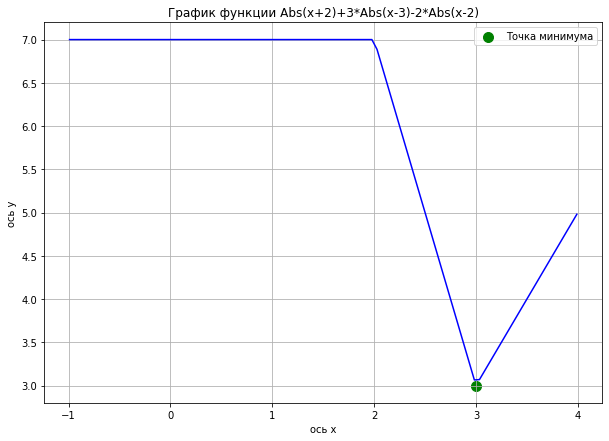

In [ ]:
all_f_of_method_parabola()

## Метод Брента
```
# def method_Brenta(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция для нахождения минимума методом Брента
  Входные данные:
  y - функция в аналитическом виде, str
  g - границы области оптимизации, str
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр
  '''
# def all_f_for_method_Brent():
  '''
  Функция для объединения ввода, нахождения минимума и построения графика
  '''
```

In [ ]:
def method_Brent(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  step=1
  y=parsing.sympy_parser.parse_expr(y)
  for x_ in y.free_symbols:
    x=x_
  eps=float(eps)
  step_max=float(step_max)
  a=g.split(',')[0].replace('[','')
  b=g.split(',')[1].replace(']','')
  if 'pi' in a:
    a=a.split('*')
    a=float(a[0])*pi
  else:
    a=float(a)
  if 'pi' in b:
    b=b.split('*')
    b=float(b[0])*pi
  else:
    b=float(b)
  r=(3-sqrt(5))/2
  x_s,v,w=[a+r*(b-a)]*3
  d_cur,d_prv=[b-a]*2
  if dataset=='True':
    data=pd.DataFrame([[0,x_s,w,v,'-','-','-']],columns=['Номер итерации','x_s','w','v','u','x_solve','y'])
  while step<step_max and max(x_s-a,b-x_s)>eps:
    g=d_prv/2
    d_prv=d_cur
    f1=float(y.subs(x,x_s))
    f2=float(y.subs(x,w))
    f3=float(y.subs(x,v))
    a1=(f2-f1)/(w-x_s)
    a2=((f3-f1)/(v-x_s)-(f2-f1)/(w-x_s))/(v-w)
    if a2==0:
      u=nan
    else:
      u=float(1/2*(x_s+w-a1/a2))
    if math.isnan(u) or u<=a or u>=b or math.fabs(u-x_s)>g:
      if x_s<(a+b)/2:
        u=float(x_s+r*(b-x_s))
        d_prv=float(b-x_s)
      else:
        u=float(x_s-r*(x_s-a))
        d_prv=float(x_s-a)
    d_cur=math.fabs(u-x_s)
    if y.subs(x,u)>y.subs(x,x_s):
      if u<x_s:
        a=u
      else:
        b=u
      if y.subs(x,u)<=y.subs(x,w) or w==x_s:
        v=w
        w=u
      else:
        if y.subs(x,u)<=y.subs(x,v) or v==w:
          v=u
    else:
      if u<x_s:
        b=x_s
      else:
        a=x_s
      v=w
      w=x_s
      x_s=u
    step+=1
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',f'{float(x_s):.5f}','y =',f'{float(y.subs(x,x_s)):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x_s,w,v,u,f'{float(x_s):.5f}',f'{float(y.subs(x,x_s)):.5f}']],columns=['Номер итерации','x_s','w','v','u','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
    step+=1
  print('Полученный минимум функции методом Брента: x =',f'{float(x_s):.5f}','y =',f'{float(y.subs(x,x_s)):.5f}')
  if dataset=='True':
    return data,x_s
  else:
    return x_s

In [ ]:
def all_f_of_method_Brent():
  a=f_input()
  s=method_Brent(*a)
  if type(s)==tuple:
    graph(a[0],a[1],s[1])
  else:
    graph(a[0],a[1],s)

## Метода Брента. Примеры

Введите функцию y=f(x). Пример: x**2. Ввод:10+x**2-10*cos(2*pi*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-1,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = -0.00000 y = 0.00000


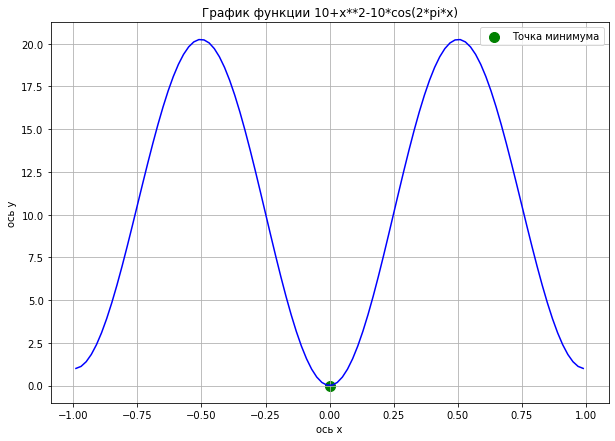

In [ ]:
#Функция Растригина
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:(x**4-16*x**2+5*x)/2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5,5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = -2.90353 y = -39.16617


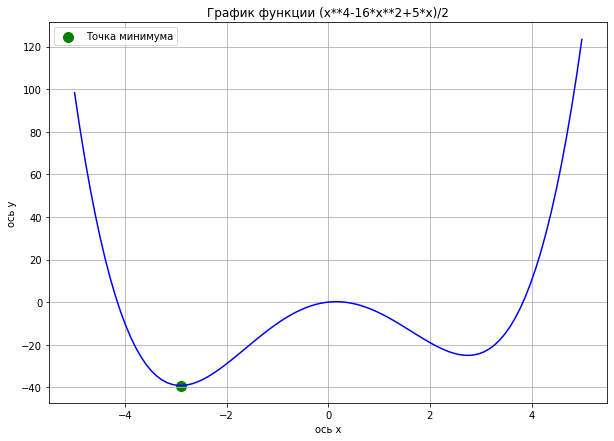

In [ ]:
#Функция Стыбинского-Танга
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:-5*x**5+4*x**4-12*x**3+11*x**2-2*x+1
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-0.5,0.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом парабол: x = 0.10986 y = 0.89763


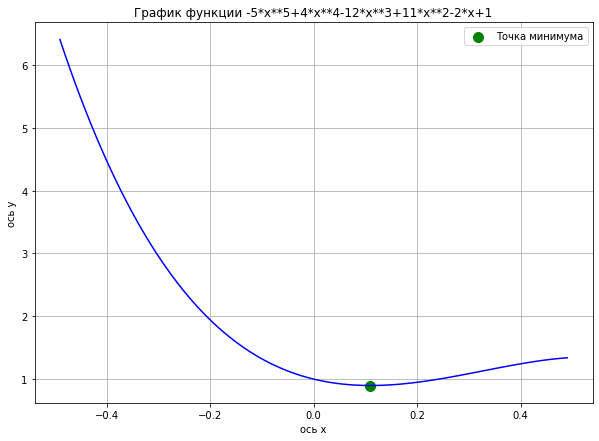

In [ ]:
#Функции для тестирования из файла ТЗ
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:(log(x-2))**2+(log(10-x))**2-x**0.2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[6,9.9]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 8.50159 y = 2.13384


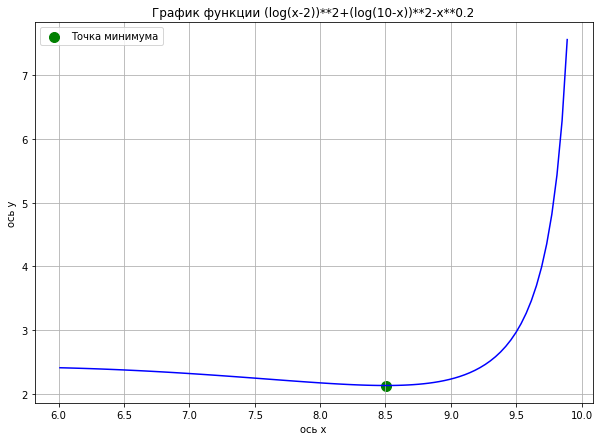

In [ ]:
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:-3*x*sin(0.75*x)+exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,2*pi]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 2.70648 y = -7.27436


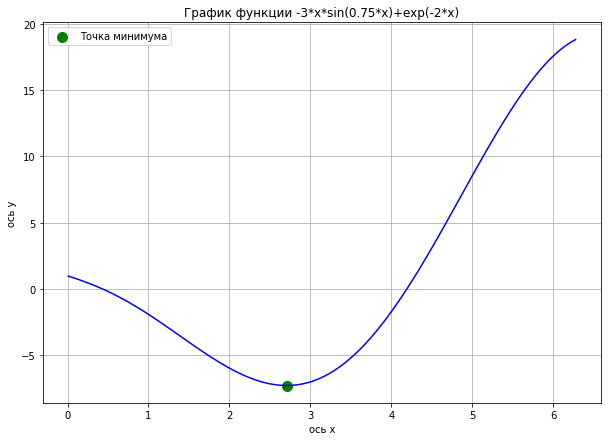

In [ ]:
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 0.24079 y = 5.14834


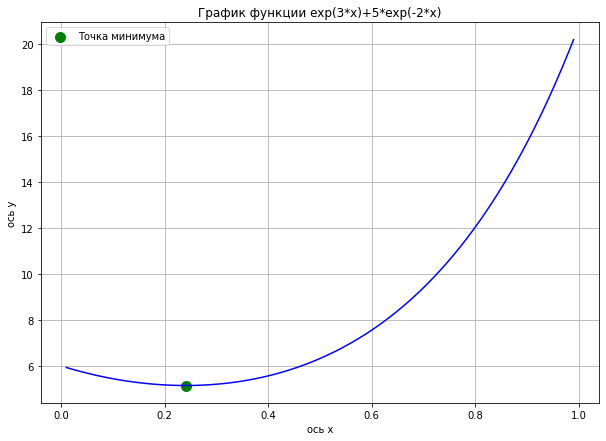

In [ ]:
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.5,2.5]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 2.12464 y = 0.35098


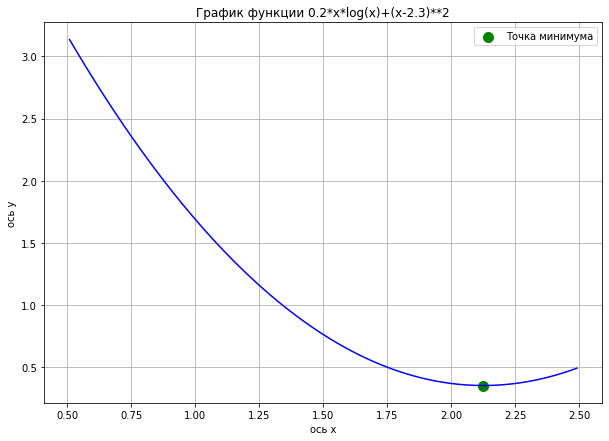

In [ ]:
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:3*x-log(x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[0.1,1]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 0.33333 y = 2.09861


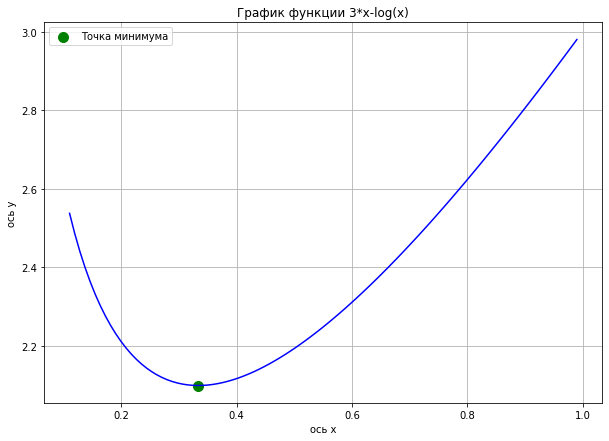

In [ ]:
#Собственные примеры тестирования алгоритма
all_f_of_method_Brent()

Введите функцию y=f(x). Пример: x**2. Ввод:Abs(x+2)+3*Abs(x-3)-2*Abs(x-2)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-1,4]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Брента: x = 3.00000 y = 3.00001


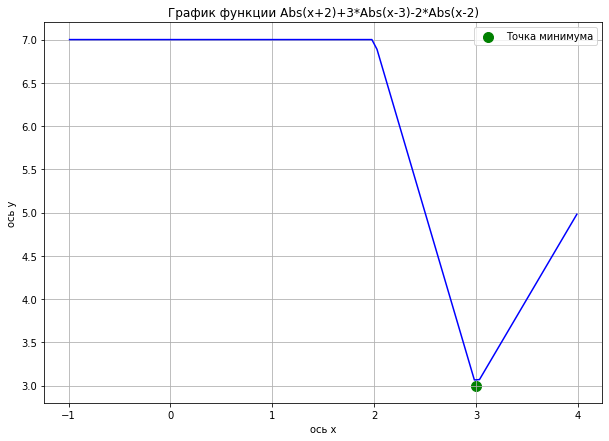

In [ ]:
all_f_of_method_Brent()

## Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно


```
# def method_inaccur_optim(y,x_k,rho=10**(-4),sigma=0.1,alpha_max=1000,len_x=10**(-8),step_max=500,options='False',dataset='False'):
   '''
  Функция метода неточной одномерной минимизации
  Входные данные:
  y - функция в аналитическом виде, str
  x_k - начальная точка, float
  rho - параметр для первого условия Вольфе,float
  sigma - параметр для второго условия Вольфе,float
  alpha_max - максимально возможное значение аргумента, float
  len_x - порог выхода по длине интервала поиска,float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр
  '''
# def all_f_for_method_inaccur_optim():
  '''
  Функция для объединения ввода, нахождения минимума и построения графика
  '''
```



In [ ]:
def method_inaccur_optim(y,x_k,rho=10**(-4),sigma=0.1,alpha_max=1000,len_x=10**(-8),step_max=500,options='False',dataset='False'):
  y=parsing.sympy_parser.parse_expr(y)
  for x_ in y.free_symbols:
    x=x_
  x_k=float(x_k)
  rho=float(rho)
  sigma=float(sigma)
  alpha_max=float(alpha_max)
  len_x=float(len_x)
  step_max=float(step_max)
  g=diff(y,x)
  g_k=g.subs(x,x_k)
  d=-diff(y,x)
  d_k=d.subs(x,x_k)
  f_Ldiff=g_k*d_k
  a_L=0
  a_U=alpha_max
  f_L=y.subs(x,x_k)
  f_Ld=g_k*d_k
  a_0=1
  step=1
  if dataset=='True':
    data=pd.DataFrame([[0,a_L,a_U,a_0,'-']],columns=['Номер итерации','a_L','a_U','a_0','y'])
  while a_0<alpha_max and math.fabs(a_U-a_L)>len_x and step<step_max:
    f0=y.subs(x,x_k-a_0*d_k)
    if f0>f_L+rho*(a_0-a_L)*f_Ld:
      f1=float(y.subs(x,a_L))
      f2=float(y.subs(x,a_0))
      f3=float(y.subs(x,a_U))
      a0=f1
      a1=(f2-f1)/(a_0-a_L)
      a2=((f3-f1)/(a_U-a_L)-(f2-f1)/(a_0-a_L))/(a_U-a_0)
      a_solve=float(1/2*(a_L+a_0-a1/a2))
      if a_U>a_0:
        a_U=a_0
      if round(a_0,5)==round(a_solve,5):
        break
      a_0=a_solve
      f0=y.subs(x,x_k+a_0*d_k)
    f0_diff=g.subs(x,x_k+a_0*d_k)*d_k
    if f0_diff<sigma*f_Ld:
      f1=float(y.subs(x,a_L))
      f2=float(y.subs(x,a_0))
      f3=float(y.subs(x,a_U))
      a0=f1
      a1=(f2-f1)/(a_0-a_L)
      a2=((f3-f1)/(a_U-a_L)-(f2-f1)/(a_0-a_L))/(a_U-a_0)
      a_solve=float(1/2*(a_L+a_0-a1/a2))
      a_L=a_U
      a_U=a_0
      if a_L>a_U:
        a_h=a_L
        a_L=a_U
        a_U=a_h
      a_0=a_solve
      f_l=f0
      f_Ld=f0_diff
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',f'{float(a_0):.5f}','y =',f'{float(y.subs(x,a_0)):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,a_L,a_U,f'{float(a_0):.5f}',f'{float(y.subs(x,a_0)):.5f}']],columns=['Номер итерации','a_L','a_U','a_0','y'])
      data=pd.concat(data1,ignore_index=True)
    step+=1
  print('Полученный минимум функции методом неточной оптимизации: x =',f'{float(a_0):.5f}','y =',f'{float(y.subs(x,a_0)):.5f}')
  if dataset=='True':
    return data,a_0
  else:
    return a_0

In [ ]:
def all_f_of_method_inaccur_optim():
  a=f_input_new()
  s=method_inaccur_optim(*a)
  if type(s)==tuple:
    graph_new(a[0],s[1])
  else:
    graph_new(a[0],s)

## Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно. Примеры

Введите функцию y=f(x). Пример: x**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите начальную точку. Пример: 0. Ввод:0
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом неточной оптимизации: x = 0.24106 y = 5.14834


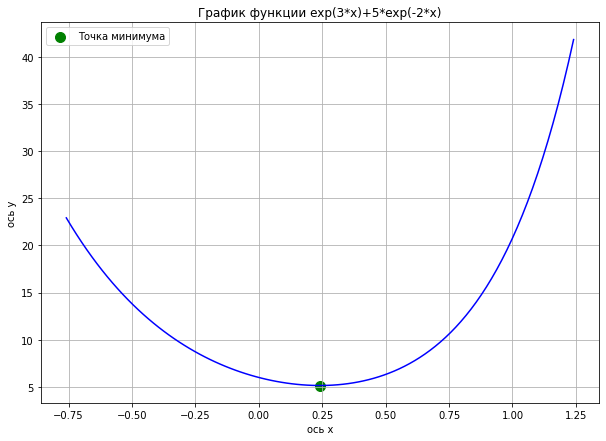

In [ ]:
all_f_of_method_inaccur_optim()

Введите функцию y=f(x). Пример: x**2. Ввод:-x/(x**2+2)
Введите начальную точку. Пример: 0. Ввод:0
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:1
Введите параметр для первого условия Вольфе. Пример: 0.0001. Ввод:0.00001
Введите параметр для второго условия Вольфе. Пример: 0.1. Ввод:0.3
Введите максимально возможное значение аргумента. Пример: 100. Ввод:100
Введите порог выхода по длине интервала поиска. Пример: 0.00001. Ввод:0.00001
Введите максимальное число итераций. Пример: 500. Ввод:500
Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:True
Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:False
Промежуточный результат на итерации 1 : x = 50.01485 y = -0.01998
Промежуточный результат на итерации 2 : x = 25.03683 y = -0.03981
Промежуточный результат на итерации 3 : x = 12.57603 y = -0.07852
Промежуточный результат на итерации 4 : x = 6.39850 y = -0.14901

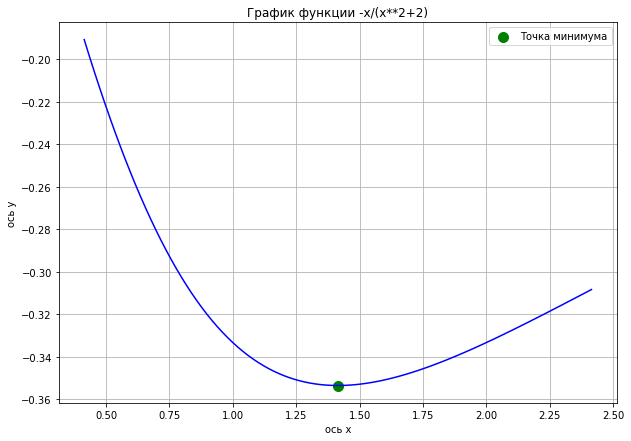

In [ ]:
all_f_of_method_inaccur_optim()

## Визуализация работы метода парабол на примере функции $y=x^4-2x+3$

In [ ]:
def all_f_of_method_parabola_():
  a=a=f_input()
  s=method_parabola(*a)
  if type(s)==tuple:
    graph(a[0],a[1],s[1])
    return s[0]
  else:
    graph(a[0],a[1],s)

Введите функцию y=f(x). Пример: x**2. Ввод:10+x**2-10*cos(2*pi*x)
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[-5.15,5.15]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:1
Введите точность оптимизации. Пример: 0.0001. Ввод:0.0001
Введите максимальное число итераций. Пример: 500. Ввод:25
Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:True
Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:True
Промежуточный результат на итерации 1 : x = 0.00096 y = 0.00018
Промежуточный результат на итерации 2 : x = -0.08952 y = 1.54867
Промежуточный результат на итерации 3 : x = -0.00001 y = 0.00000
Промежуточный результат на итерации 4 : x = 0.00000 y = 0.00000
Полученный минимум функции методом парабол: x = 0.00000 y = 0.00000


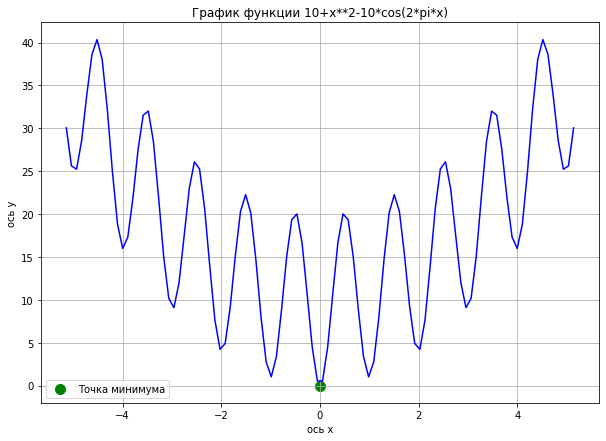

In [ ]:
d=all_f_of_method_parabola_()

In [ ]:
d

,Номер итерации,x1,x2,x3,a0,a1,a2,x_solve,y
0,0,-5.050000,-4.95,5.05000,2.599193e+01,-10.000000,1.000000,0.00000,0.00000
1,1,-4.950000,0.00,5.05000,2.499193e+01,-5.048876,1.019579,0.00096,0.00018
2,2,-4.950000,0.00,0.00096,2.499193e+01,-5.048876,1.058252,-0.08952,1.54867
3,3,-0.089522,0.00,0.00096,1.548670e+00,-17.299382,193.296976,-0.00001,0.00000
4,4,-0.000013,0.00,0.00096,3.176246e-08,-0.002510,198.391497,0.00000,0.00000


In [ ]:
!pip install celluloid

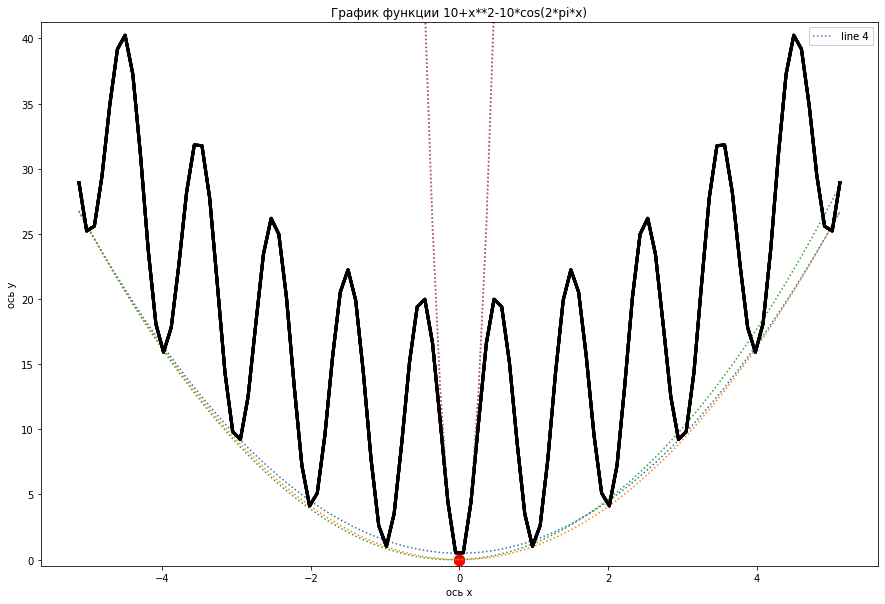

In [ ]:
from celluloid import Camera
from matplotlib.animation import PillowWriter
fig = plt.figure(figsize=(15,10))
camera = Camera(fig)
y='10+x**2-10*cos(2*pi*x)'
y1=parsing.sympy_parser.parse_expr(y)
x_range=np.linspace(-5.12,5.12,100)
for x_ in y1.free_symbols:
  x=x_
y_range=[float(y1.subs(x,x_range[i])) for i in range(len(x_range))]
x_solve=0
y_min=y1.subs(x,x_solve)
for i in range(len(d)):
  y_list=[]
  for j in range(len(x_range)):
    y_list.append(d['a0'][i]+d['a1'][i]*(x_range[j]-d['x1'][i])+d['a2'][i]*(x_range[j]-d['x1'][i])*(x_range[j]-d['x2'][i]))
  t = plt.plot(x_range,y_list, linestyle = ':')
  s = plt.plot(x_range,y_range,linewidth = 3, color='black')
  a = plt.scatter(x_solve,y_min,s=100,color='red',label='Точка минимума')
  s='График функции '+str(y)
  plt.title(s)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  plt.ylim(min(y_range)-1,max(y_range)+1)
  plt.legend(t,[f'line {i}'])
  camera.snap()
plt.show()
animation = camera.animate()
writer = PillowWriter(fps=5)
animation.save('animation.gif', writer=writer)

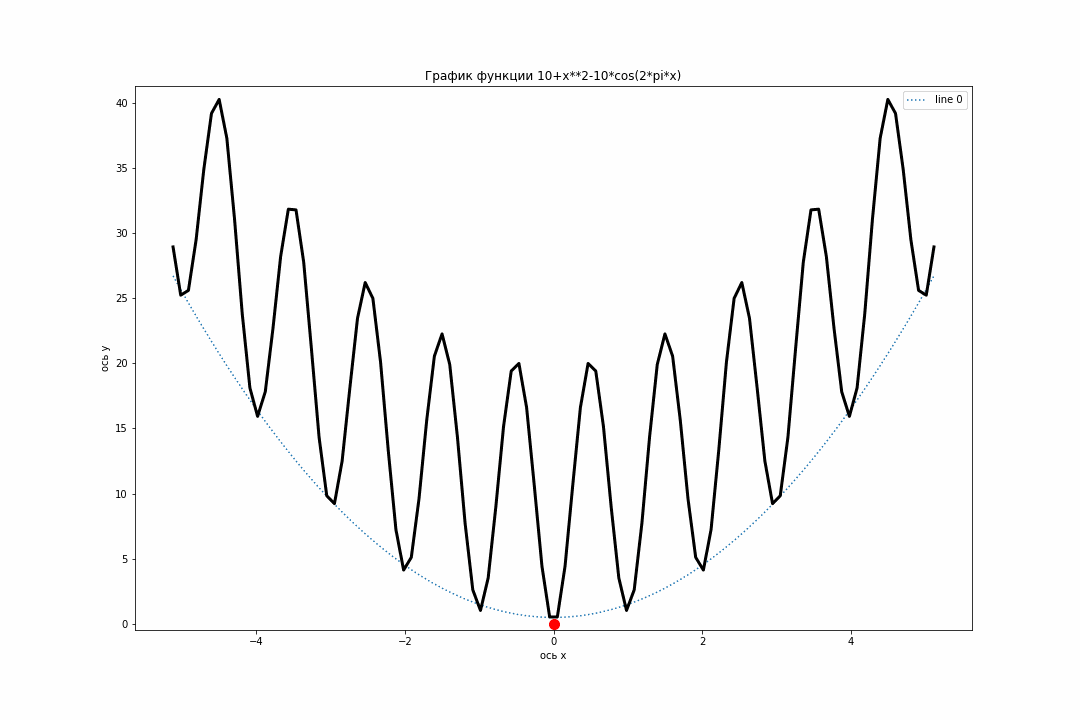

***Анимация метода парабол***




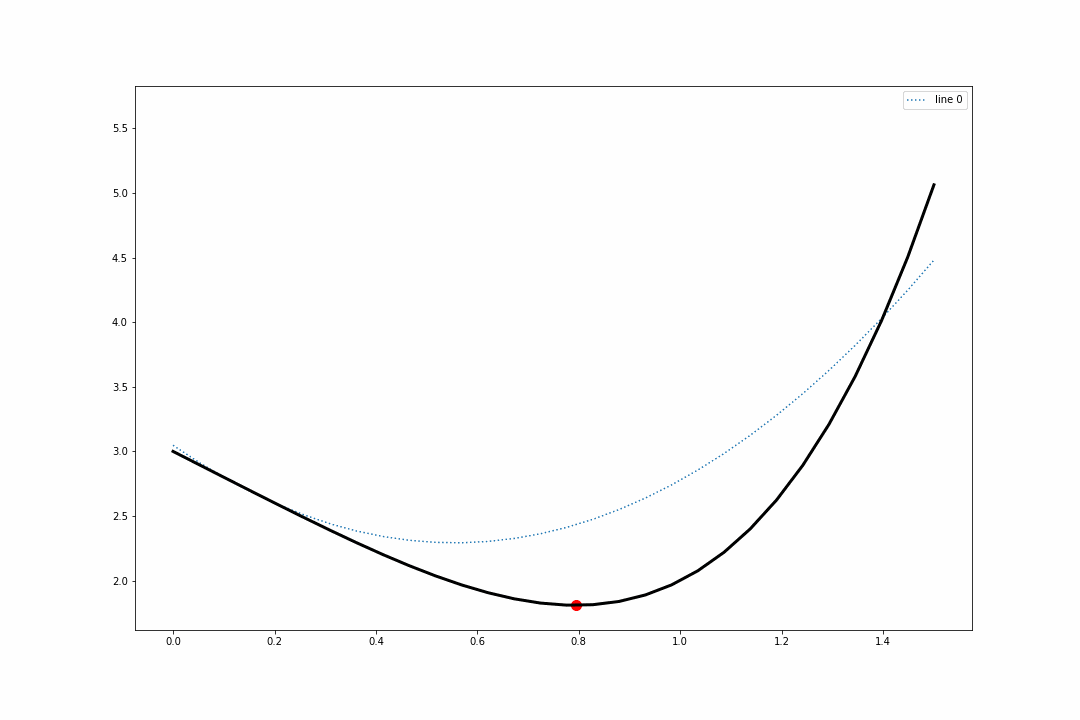

## Оценка сходимости алгоритма метода парабол

In [ ]:
def method_parabola_for_convergence(y,g,eps=0.00001,step_max=500,options='False',dataset='False'):
  step=1
  steps=[]
  convergence=[]
  y=parsing.sympy_parser.parse_expr(y)
  for x_ in y.free_symbols:
    x=x_
  eps=float(eps)
  step_max=float(step_max)
  a=g.split(',')[0].replace('[','')
  b=g.split(',')[1].replace(']','')
  if 'pi' in a:
    a=a.split('*')
    a=float(a[0])*pi
  else:
    a=float(a)
  if 'pi' in b:
    b=b.split('*')
    b=float(b[0])*pi
  else:
    b=float(b)
  x2=a+0.2
  x1=a+0.1
  x3=b-0.1
  while y.subs(x,x2)>y.subs(x,x1) or y.subs(x,x2)>y.subs(x,x3):
    x2+=0.1
  f1=float(y.subs(x,x1))
  f2=float(y.subs(x,x2))
  f3=float(y.subs(x,x3))
  a0=f1
  a1=(f2-f1)/(x2-x1)
  a2=((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
  x_solve=float(1/2*(x1+x2-a1/a2))
  x_solve_old=x_solve-1
  while math.fabs(x_solve_old-x_solve)>eps and step<step_max:
    f_x=float(y.subs(x,x_solve))
    f_x2=float(y.subs(x,x2))
    if f_x < f_x2:
      if x_solve < x2:
        x3 = x2
        x2=x_solve
      else:
        x1 = x2
        x2 = x_solve
    else:
      if x2 < x_solve:
        x3 = x_solve
      else:
        x1 = x_solve
    f1=float(y.subs(x,x1))
    f2=float(y.subs(x,x2))
    f3=float(y.subs(x,x3))
    a0=f1
    a1=(f2-f1)/(x2-x1)
    a2=((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
    x_solve_old=x_solve
    x_solve=float(1/2*(x1+x2-a1/a2))
    steps.append(step)
    convergence.append(math.fabs(x3-x1))
    print('На итерации',step,'величина интервала равна',math.fabs(x3-x1))
    step+=1
  print('Полученный минимум функции методом парабол: x =',f'{float(x_solve):.5f}','y =',f'{float(y.subs(x,x_solve)):.5f}')
  return x_solve,steps,convergence

In [ ]:
def all_f_of_method_parabola_for_convergence():
  a=a=f_input()
  s=method_parabola_for_convergence(*a)
  graph(a[0],a[1],s[0])
  return s[1],s[2]

Введите функцию y=f(x). Пример: x**2. Ввод:(log(x-2))**2+(log(10-x))**2-x**0.2
Введите границы области оптимизации в формате отрезка. Пример: [-1,1]. Ввод:[6,9.9]
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
На итерации 1 величина интервала равна 3.6000000000000005
На итерации 2 величина интервала равна 3.5163193684465055
На итерации 3 величина интервала равна 3.415402860185978
На итерации 4 величина интервала равна 3.315830751504217
На итерации 5 величина интервала равна 3.2096420156779626
На итерации 6 величина интервала равна 3.102687955449057
На итерации 7 величина интервала равна 2.993914683998854
На итерации 8 величина интервала равна 2.885782635514466
На итерации 9 величина интервала равна 2.7789011545679205
На итерации 10 величина интервала равна 2.674638242712428
На итерации 11 величина интервала равна 2.573754633120478
На итерации 12 величина интервала равна 2.4770470538550464
На итерации 13 величина интервала 

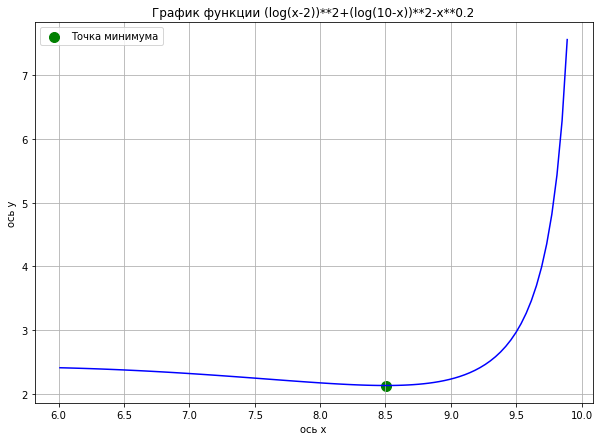

In [ ]:
d=all_f_of_method_parabola_for_convergence()

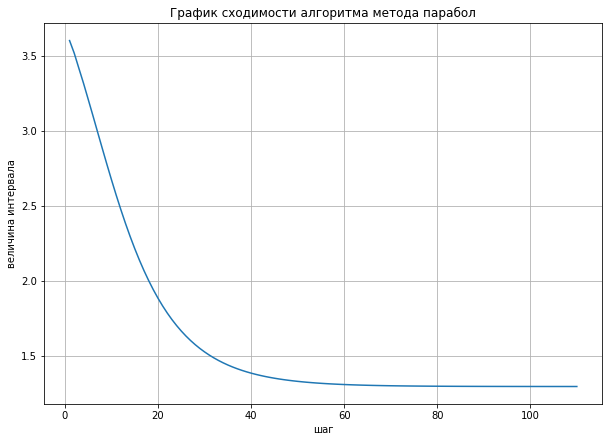

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('График сходимости алгоритма метода парабол')
plt.plot(d[0],d[1])
plt.xlabel('шаг')
plt.ylabel('величина интервала')
plt.grid()
plt.show()